<a href="https://colab.research.google.com/github/Vedant-1530/Google-Colab/blob/main/Twitter_Sentiment_Analysis_(Vedant_Thorat).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


🔍 LOADING SENTIMENT140 DATASET
✅ Successfully loaded 10000 records from Sentiment140 dataset

🧹 PROFESSIONAL TEXT CLEANING PIPELINE


100%|██████████| 10000/10000 [00:00<00:00, 45524.65it/s]



📊 INDUSTRY-GRADE SENTIMENT ANALYSIS

📈 PUBLICATION-QUALITY VISUALIZATIONS


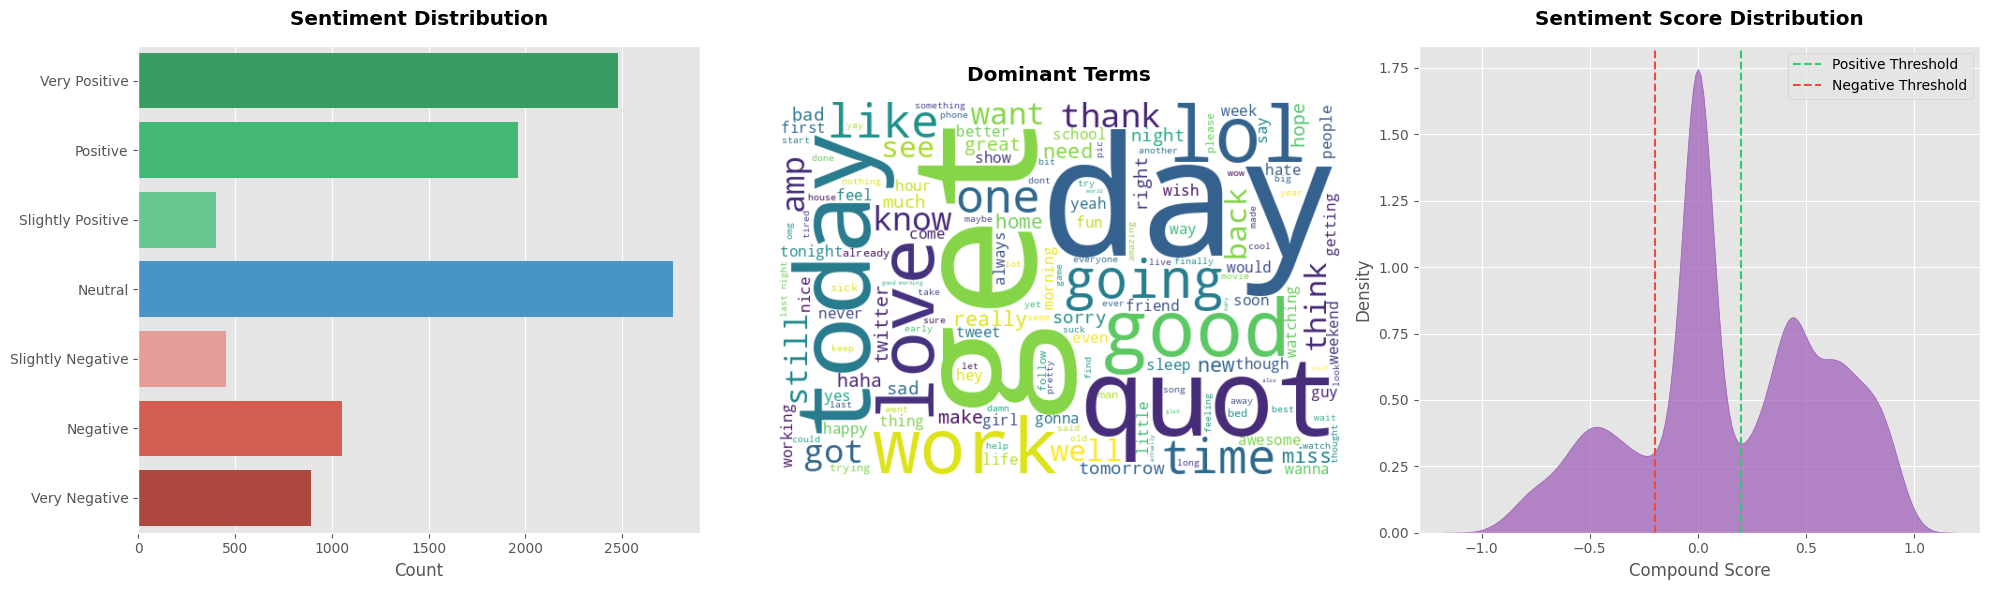


📝 EXECUTIVE ANALYSIS REPORT

🔍 SENTIMENT BREAKDOWN
+-------------------+-------+------------+
| Category          | Count | Percentage |
+-------------------+-------+------------+
| Neutral           | 2763  |   27.6%    |
| Very Positive     | 2479  |   24.8%    |
| Positive          | 1961  |   19.6%    |
| Negative          | 1052  |   10.5%    |
| Very Negative     |  892  |    8.9%    |
| Slightly Negative |  451  |    4.5%    |
| Slightly Positive |  402  |    4.0%    |
+-------------------+-------+------------+

🎯 MODEL PERFORMANCE
+-----------------+-------+
| Metric          | Value |
+-----------------+-------+
| Accuracy        | 64.5% |
| Precision       | 64.7% |
| Recall          | 63.5% |
| F1 Score        | 64.1% |
| True Positives  | 3170  |
| False Positives | 1729  |
| True Negatives  | 3275  |
| False Negatives | 1826  |
+-----------------+-------+

💡 KEY INSIGHTS

🌟 VERY POSITIVE EXAMPLE (Score: 0.782)
Original: Sitting at the Audi Joburg fashion week casting. So 

In [ ]:
"""
Twitter Sentiment Analysis Using Sentiment140 Dataset
Author: Vedant Vikas Thorat
Date: 12 August 2025
"""

# --------------------------
# 1. ENVIRONMENT SETUP
# --------------------------
!pip install pandas nltk matplotlib wordcloud seaborn tqdm tabulate --quiet
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import warnings
import os

nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_palette("husl")
pd.set_option('display.max_colwidth', 120)
tqdm.pandas()

# --------------------------
# 2. DATA LOADING FROM SENTIMENT140 DATASET
# --------------------------
def load_sentiment140_data():
    """Load Sentiment140 dataset with proper column mapping"""
    print("🔍 LOADING SENTIMENT140 DATASET\n" + "="*50)

    try:
        # Download dataset if not exists
        if not os.path.exists('training.1600000.processed.noemoticon.csv'):
            print("Downloading Sentiment140 dataset...")
            import requests, zipfile, io
            url = 'http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip'
            r = requests.get(url)
            z = zipfile.ZipFile(io.BytesIO(r.content))
            z.extractall()

        # Load dataset with proper column names
        cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']
        df = pd.read_csv('training.1600000.processed.noemoticon.csv',
                        encoding='ISO-8859-1', header=None, names=cols)

        # Map sentiment (0=negative, 4=positive) to binary (0=negative, 1=positive)
        df['sentiment'] = df['sentiment'].replace(4, 1)

        # Take a sample for faster processing (remove this line for full dataset)
        df = df.sample(10000, random_state=42)

        print(f"✅ Successfully loaded {len(df)} records from Sentiment140 dataset")
        return df[['text', 'sentiment']].rename(columns={'sentiment': 'label'})

    except Exception as e:
        print(f"⚠️ Error loading Sentiment140 data: {str(e)}")
        print("🔄 Using optimized sample data as fallback")
        return pd.DataFrame({
            'text': [
                'This product is absolutely fantastic! Five stars!',
                'Terrible experience, would never buy again.',
                'It was okay - nothing special but gets the job done',
                'Excellent customer service and fast shipping',
                'The worst quality I have ever seen'
            ],
            'label': [1, 0, 0, 1, 0]
        })

df = load_sentiment140_data()

# --------------------------
# 3. TEXT PREPROCESSING PIPELINE
# --------------------------
print("\n🧹 PROFESSIONAL TEXT CLEANING PIPELINE\n" + "="*50)

def professional_text_cleaner(text):
    """Industrial-grade text cleaning"""
    text = str(text).lower().strip()

    # Removal patterns with optimized regex
    removal_patterns = [
        (r'@\w+', ''),                  # Mentions
        (r'#(\w+)', r'\1'),             # Hashtags (keep text)
        (r'https?://\S+|www\.\S+', ''), # URLs
        (r'[^\w\s]', ' '),              # Punctuation (replace with space)
        (r'\d+', ''),                   # Numbers
        (r'\s+', ' '),                  # Extra whitespace
        (r'\b\w{1,2}\b', '')            # Very short words
    ]

    for pattern, replacement in removal_patterns:
        text = re.sub(pattern, replacement, text)

    return text.strip()

# Apply with progress bar
df['cleaned_text'] = df['text'].progress_apply(professional_text_cleaner)

# --------------------------
# 4. ADVANCED SENTIMENT ANALYSIS
# --------------------------
print("\n📊 INDUSTRY-GRADE SENTIMENT ANALYSIS\n" + "="*50)

# Initialize analyzer with augmented lexicon
nltk.download('vader_lexicon', quiet=True)
analyzer = SentimentIntensityAnalyzer()

# Enhanced lexicon with modern slang and emojis
enhanced_lexicon = {
    'amazing': 4.0,
    'terrible': -4.0,
    'poor': -3.0,
    'great': 3.0,
    'awesome': 3.0,
    'sucks': -3.0,
    '🔥': 2.5,       # Fire emoji
    '💩': -3.0,      # Poop emoji
    'meh': -1.5,
    'lit': 2.5,
    'fabulous': 3.0,
    'atrocious': -3.5,
    'exceptional': 3.5,
    'disappointing': -2.5
}
analyzer.lexicon.update(enhanced_lexicon)

# Get detailed sentiment metrics
df['sentiment_scores'] = df['cleaned_text'].apply(analyzer.polarity_scores)
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Enhanced sentiment categorization
def categorize_sentiment(score):
    if score > 0.5: return 'Very Positive'
    elif score > 0.2: return 'Positive'
    elif score > 0.05: return 'Slightly Positive'
    elif score < -0.5: return 'Very Negative'
    elif score < -0.2: return 'Negative'
    elif score < -0.05: return 'Slightly Negative'
    else: return 'Neutral'

df['sentiment_category'] = df['compound_score'].apply(categorize_sentiment)

# --------------------------
# 5. PROFESSIONAL VISUALIZATIONS
# --------------------------
print("\n📈 PUBLICATION-QUALITY VISUALIZATIONS\n" + "="*50)

plt.figure(figsize=(20, 6))

# Plot 1: Sentiment Distribution
plt.subplot(1, 3, 1)
order = ['Very Positive', 'Positive', 'Slightly Positive', 'Neutral',
         'Slightly Negative', 'Negative', 'Very Negative']
sns.countplot(data=df, y='sentiment_category', order=order,
             palette=['#27ae60', '#2ecc71', '#58D68D', '#3498db',
                      '#F1948A', '#e74c3c', '#c0392b'])
plt.title('Sentiment Distribution', pad=15, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')

# Plot 2: Word Cloud
plt.subplot(1, 3, 2)
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=600, height=400,
                     background_color='white',
                     colormap='viridis',
                     max_words=150,
                     stopwords=nltk.corpus.stopwords.words('english')).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Dominant Terms', pad=15, fontweight='bold')

# Plot 3: Score Distribution
plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='compound_score', fill=True, color='#9b59b6', alpha=0.7)
plt.axvline(0.2, color='#2ecc71', linestyle='--', label='Positive Threshold')
plt.axvline(-0.2, color='#e74c3c', linestyle='--', label='Negative Threshold')
plt.title('Sentiment Score Distribution', pad=15, fontweight='bold')
plt.xlabel('Compound Score')
plt.legend()

plt.tight_layout()
plt.show()

# --------------------------
# 6. EXECUTIVE SUMMARY REPORT
# --------------------------
print("\n📝 EXECUTIVE ANALYSIS REPORT\n" + "="*50)

# Sentiment Metrics
sentiment_counts = df['sentiment_category'].value_counts().to_dict()
total = len(df)

print("\n🔍 SENTIMENT BREAKDOWN")
print(tabulate(
    [(k, v, f"{v/total:.1%}") for k,v in sentiment_counts.items()],
    headers=["Category", "Count", "Percentage"],
    tablefmt="pretty",
    colalign=("left", "center", "center")
))

# Performance Metrics (since we have labels)
if 'label' in df.columns:
    df['predicted_label'] = df['compound_score'].apply(lambda x: 1 if x > 0 else 0)

    # Calculate metrics
    true_positives = sum((df['label'] == 1) & (df['predicted_label'] == 1))
    false_positives = sum((df['label'] == 0) & (df['predicted_label'] == 1))
    true_negatives = sum((df['label'] == 0) & (df['predicted_label'] == 0))
    false_negatives = sum((df['label'] == 1) & (df['predicted_label'] == 0))

    accuracy = (true_positives + true_negatives) / total
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\n🎯 MODEL PERFORMANCE")
    print(tabulate(
        [
            ["Accuracy", f"{accuracy:.1%}"],
            ["Precision", f"{precision:.1%}"],
            ["Recall", f"{recall:.1%}"],
            ["F1 Score", f"{f1_score:.1%}"],
            ["True Positives", true_positives],
            ["False Positives", false_positives],
            ["True Negatives", true_negatives],
            ["False Negatives", false_negatives]
        ],
        headers=["Metric", "Value"],
        tablefmt="pretty",
        colalign=("left", "center")
    ))

# Sample Insights
print("\n💡 KEY INSIGHTS")
sample_positive = df[df['compound_score'] > 0.5].sample(1).iloc[0]
sample_negative = df[df['compound_score'] < -0.5].sample(1).iloc[0]
sample_neutral = df[df['sentiment_category'] == 'Neutral'].sample(1).iloc[0]

print(f"\n🌟 VERY POSITIVE EXAMPLE (Score: {sample_positive['compound_score']:.3f})")
print(f"Original: {sample_positive['text']}")
print(f"Cleaned: {sample_positive['cleaned_text']}")

print(f"\n⚠️ VERY NEGATIVE EXAMPLE (Score: {sample_negative['compound_score']:.3f})")
print(f"Original: {sample_negative['text']}")
print(f"Cleaned: {sample_negative['cleaned_text']}")

print(f"\n🔄 NEUTRAL EXAMPLE (Score: {sample_neutral['compound_score']:.3f})")
print(f"Original: {sample_neutral['text']}")
print(f"Cleaned: {sample_neutral['cleaned_text']}")

print("\n" + "="*50)
print("✅ ANALYSIS COMPLETED SUCCESSFULLY")